In [1]:
import sys
import os


notebook_path = os.getcwd()
module_path = os.path.join(notebook_path, '..')
# add your Confocal_GUI directory path 

sys.path.append(module_path)

from confocal_gui.live_plot import ple, pl, live, change_to_inline, change_to_nbagg, enable_long_output
from confocal_gui.logic import LaserStabilizer, VirtualLaserStabilizerCore
from confocal_gui.virtual_device import VirtualScanner, virtual_read_counts
# from confocal_gui.device import *
# define your device in confocal_gui/device.py
from confocal_gui.gui import GUI

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# initialize all classes and functions, bind them to devices wanted

enable_long_output()
# make sure that GUI() can output fig to jupyter notebook cell without being scrolled

config = {
    
    "scanner": {
        "type": "VirtualScanner",
    },
    
    "counter": {
        "type": "virtual_read_counts",
    },
    
    "laser_stabilizer_core": {
        "type": "VirtualLaserStabilizerCore",
        'config_instances':'config_instances'
    },
    
    "laser_stabilizer": {
        "type": "LaserStabilizer",
        'config_instances':'config_instances'
    },
    
    
}
# scanner, counter, laser_stabilizer_core, laser_stabilizer, wavemeter, laser etc. 
# are default keys for all functions to call objetive, 'type' defines bind which class
# or function to the key.

def initialize_classes(config):
    instances = {}
    
    for key, params in config.items():
        if 'config_instances' not in params:
            if key not in instances:
                # if already loaded, skip
                type_name = params.pop('type')
                class_or_func = globals()[type_name]

                if callable(class_or_func):
                    if hasattr(class_or_func, '__call__') and not hasattr(class_or_func, '__bases__'):
                        instances[key] = class_or_func
                    else:
                        instances[key] = class_or_func(**params)

    for key, params in config.items():
        if 'config_instances' in params:
            if key not in instances:
                # if already loaded, skip
                type_name = params.pop('type')
                class_or_func = globals()[type_name]
                params.pop('config_instances')  # Remove the config_instances key
                instances[key] = class_or_func(instances, **params)
            
    for key, value in instances.items():
        print(f"{key}: {value}")
        print('\n')
        
    
    return instances

config_instances = initialize_classes(config)


scanner: <confocal_gui.virtual_device.VirtualScanner object at 0x0000023F983790C8>


counter: <function virtual_read_counts at 0x0000023F801AECA8>


laser_stabilizer_core: <confocal_gui.logic.VirtualLaserStabilizerCore object at 0x0000023F985873C8>


laser_stabilizer: <LaserStabilizer(Thread-8, initial daemon)>




In [3]:
help(ple)

Help on function ple in module confocal_gui.live_plot:

ple(wavelength_array, exposure, config_instances)



<IPython.core.display.Javascript object>


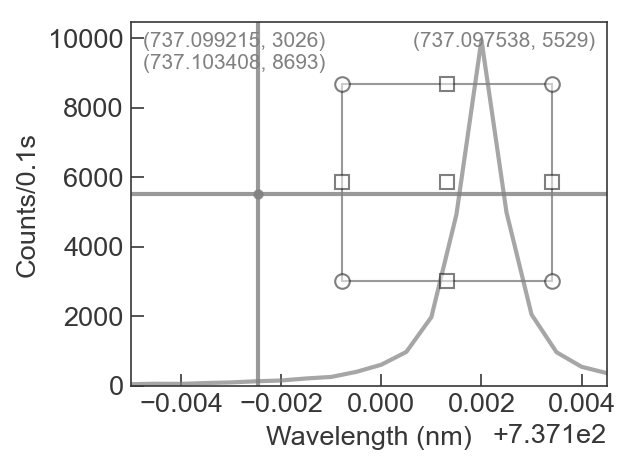

In [4]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
fig, data_figure = ple(np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict})

In [ ]:
# use mouse left to select/cancel area in fig
# use mouse middle to scroll range
# use mouse right to select point, or double clicks to remove point

<IPython.core.display.Javascript object>


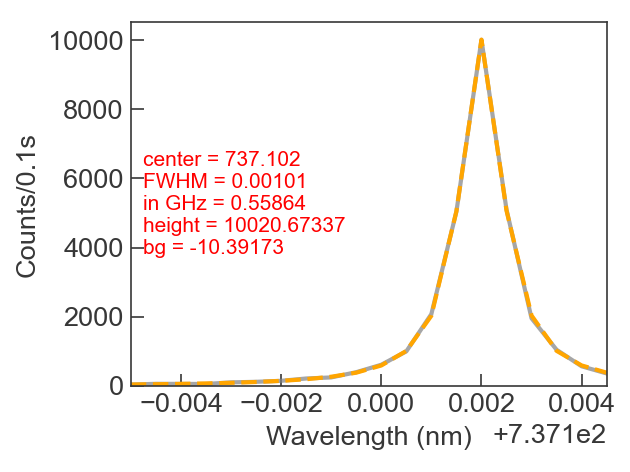

In [6]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
fig, data_figure = ple(np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict})

In [7]:
data_figure.data
# get data from return data_figure
# data_figure is a instance of DataFigure 
# defines in confocal_gui.live_plot

[array([737.095 , 737.0955, 737.096 , 737.0965, 737.097 , 737.0975,
        737.098 , 737.0985, 737.099 , 737.0995, 737.1   , 737.1005,
        737.101 , 737.1015, 737.102 , 737.1025, 737.103 , 737.1035,
        737.104 , 737.1045]),
 array([   40.,    62.,    60.,    57.,   104.,   120.,   149.,   216.,
          247.,   398.,   613.,  1000.,  2078.,  5040., 10007.,  5101.,
         1956.,  1046.,   569.,   362.])]

In [8]:
data_figure.lorent()
# call lorent() to get a lorentzian fit

In [7]:
data_figure.save()
# save figure 

In [9]:
help(pl)

Help on function pl in module confocal_gui.live_plot:

pl(center, coordinates_x, coordinates_y, exposure, config_instances, is_dis=False, wavelength=None)
    example
    
    >>> pl(center=[0, 0], coordinates_x=np.linspace(-5,5,10),         coordinates_y=np.linspace(-5,5,10), exposure=0.2)



<IPython.core.display.Javascript object>


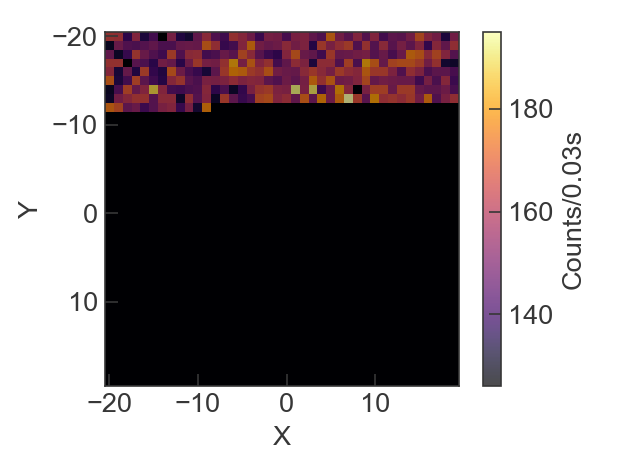

In [10]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
# defines pl_test_dict for testing purpose only
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.03, \
                               config_instances={**config_instances, **pl_test_dict})

In [ ]:
# can be interrupted by interrupt

<IPython.core.display.Javascript object>


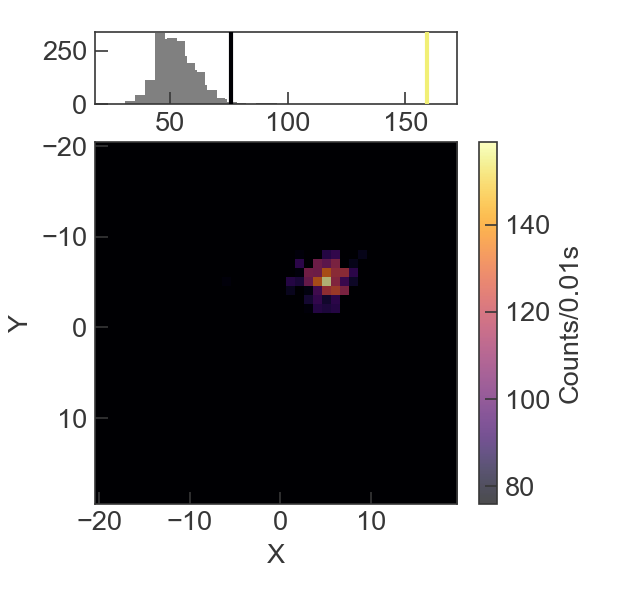

In [11]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.01, is_dis=True,\
                               wavelength = 2, config_instances={**config_instances, **pl_test_dict})

In [ ]:
# drag two vertical lines in histogram to reset colorbar
# enables remove background

In [12]:
help(live)

Help on function live in module confocal_gui.live_plot:

live(data_array, exposure, config_instances, wavelength=None, is_finite=False)



<IPython.core.display.Javascript object>


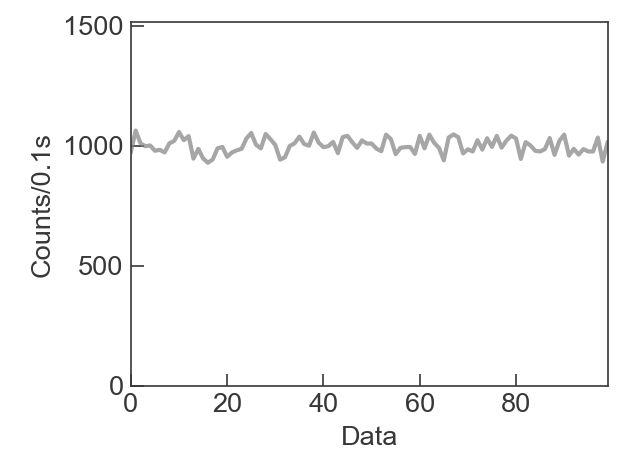

In [15]:
fig, data_figure = live(np.arange(100), exposure=0.1, wavelength=None, 
                                           is_finite=True, config_instances=config_instances)
# wavelength defines wavelength for live plot

<IPython.core.display.Javascript object>


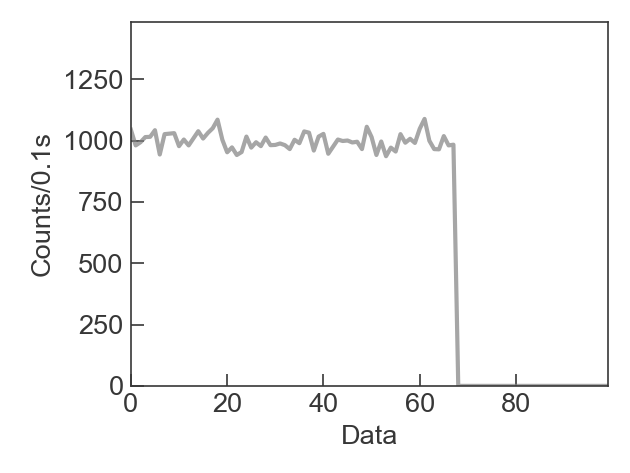

In [14]:
fig, data_figure = live(np.arange(100), exposure=0.1, config_instances=config_instances)

In [3]:
help(GUI)

Help on function GUI in module confocal_gui.gui:

GUI(config_instances)
    The function opens pyqt GUI for PLE, PL, live counts, and pulse control.
    Save button will also output data and figure to jupyter notebook.
    
    Examples
    --------
    >>> GUI()
    
    Read range button reads range from area created by mouse left 
    
        Read wavelength button reads wavelength from point created by mouse right in PLE
    
        Read XY button reads x, y coordinates from point created by mouse right in PL 
    
        Change unit changes PLE unit between 'nm' and 'GHz'
    
        Move sacnner moves scanner to x, y displayed



In [4]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.10}
# defines pl_test_dict and ple_test_dict for testing
GUI(config_instances={**config_instances, **pl_test_dict, **ple_test_dict})

PL started


Plot stopped


Text(0, 0.5, 'y')

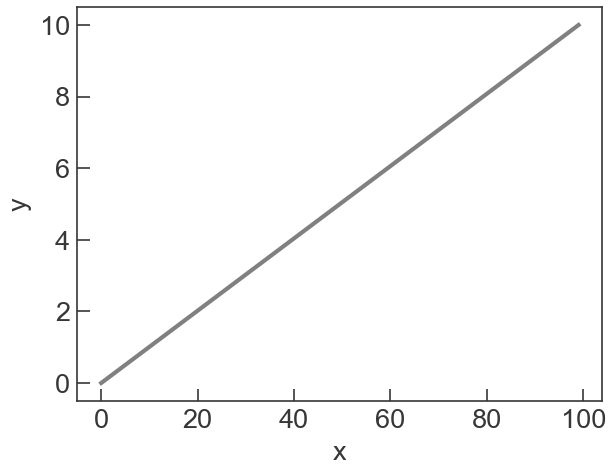

In [19]:
change_to_inline(params_type = 'inline') 
# go back to inline backend otherwise display error
plt.close()
plt.tight_layout()
plt.plot(np.linspace(0, 10, 100), color='grey')
plt.xlabel('x')
plt.ylabel('y')